#### Hadar Kosto
#### ID: 208847129


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
import matplotlib as plt

In [4]:
data1 = pd.read_csv('matala2_cosmetics_2019-Nov.csv')
data1= data1.iloc[0:500000]
data1.head()

C:\Users\kosto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [5]:
##1
data = data1.copy()
data= data.sort_values(['user_id','user_session','event_time'])
data['event_time'] = pd.to_datetime(data['event_time'])
grouped = data.groupby(['user_id','user_session'])
data['duration_to_next_event'] = grouped['event_time'].diff(periods=-1).dt.total_seconds()
data['duration_to_next_event'] = abs(data['duration_to_next_event']).fillna(0)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0
331383,2019-11-03 18:53:34+00:00,view,5713294,1487580008070251489,appliances.personal.hair_cutter,NaN,57.14,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,87.0
331546,2019-11-03 18:55:01+00:00,view,5713295,1487580008070251489,appliances.personal.hair_cutter,NaN,46.02,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,46.0
331614,2019-11-03 18:55:47+00:00,view,5713294,1487580008070251489,appliances.personal.hair_cutter,NaN,57.14,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,0.0
462864,2019-11-04 18:22:21+00:00,cart,5809910,1602943681873052386,NaN,grattol,5.24,11274156,0c778a88-4700-4e8b-becb-3371ec28ea79,20.0


In [6]:
##2
data2= data1.sort_values(['user_id','event_time'])
data2['event_time'] = pd.to_datetime(data2['event_time'])
data2['duration_from_prev_event'] = (data2['event_time']-data2['event_time'].shift(1)).dt.total_seconds()
data2['prev_user']=data2['user_id'].shift(1)
data2['duration_from_prev_event'] = np.where(data2['prev_user'] == data2['user_id'] ,1,0)*data2['duration_from_prev_event']
data2['funnel_helper']= np.where(data2['duration_from_prev_event'] >(5*24*60*60) ,1,0)

data2['funnel_number'] = data2.groupby('user_id')['funnel_helper'].cumsum() +1
data2= data2.drop(columns=['duration_from_prev_event','prev_user','funnel_helper'], axis=0)
data2.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,funnel_number
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1
331383,2019-11-03 18:53:34+00:00,view,5713294,1487580008070251489,appliances.personal.hair_cutter,NaN,57.14,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,1
331546,2019-11-03 18:55:01+00:00,view,5713295,1487580008070251489,appliances.personal.hair_cutter,NaN,46.02,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,1
331614,2019-11-03 18:55:47+00:00,view,5713294,1487580008070251489,appliances.personal.hair_cutter,NaN,57.14,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,1
462864,2019-11-04 18:22:21+00:00,cart,5809910,1602943681873052386,NaN,grattol,5.24,11274156,0c778a88-4700-4e8b-becb-3371ec28ea79,1


In [7]:
##3
df3=data2.copy()
df3.sort_values(['funnel_number','user_id', 'user_session'], inplace=True)

# Compute the 'funnel_index' for each distinct 'user_session' per 'user_id'
df3['index_in_funnel'] = df3.groupby(['user_id','funnel_number'])['user_session'].transform(lambda x: x.ne(x.shift()).cumsum())
df3.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1
331383,2019-11-03 18:53:34+00:00,view,5713294,1487580008070251489,appliances.personal.hair_cutter,NaN,57.14,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,1,1
331546,2019-11-03 18:55:01+00:00,view,5713295,1487580008070251489,appliances.personal.hair_cutter,NaN,46.02,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,1,1
331614,2019-11-03 18:55:47+00:00,view,5713294,1487580008070251489,appliances.personal.hair_cutter,NaN,57.14,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,1,1
462864,2019-11-04 18:22:21+00:00,cart,5809910,1602943681873052386,NaN,grattol,5.24,11274156,0c778a88-4700-4e8b-becb-3371ec28ea79,1,1


In [8]:
import re
df4 = data1.copy()
df4['price'] = df4['price'].astype(str)
df4['price'] =df4['price'].apply(lambda x: re.sub('[a-z,A-Z]+', '', x)).astype(float)
df4['price']

0          0.32
1          2.38
2         22.22
3          3.16
4          3.33
          ...  
499995     3.00
499996     2.38
499997     2.38
499998     3.97
499999     3.97
Name: price, Length: 500000, dtype: float64

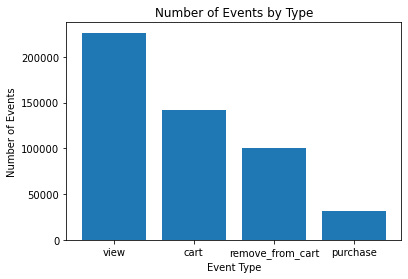

In [9]:
##5
import matplotlib.pyplot as plt
event_counts = data['event_type'].value_counts()
plt.bar(event_counts.index, event_counts.values)
plt.title('Number of Events by Type')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.show()

In [10]:
##6
#create new dataframe named session_data
session_data= df3[['user_id','user_session','funnel_number','index_in_funnel']]

#a,b,c,d
session_data= session_data.drop_duplicates(subset=["user_session",'funnel_number']).sort_values(['user_id'])

#e
session_data['total_events'] = data.groupby('user_session', sort=False)['event_type'].transform('count')

#f
session_data['total_duration']=data.groupby('user_session')['duration_to_next_event'].transform('sum')

#g
dt_v= data[data['event_type']=='view']
datav = dt_v.groupby(['user_session']).agg(
{
    'product_id': lambda x: list(x),
    
}).reset_index()
datav.columns = ['user_session','list_of_viewed'] 
session_data= session_data.merge(datav,how='left', on='user_session')

#h
dt_c= data[data['event_type']=='cart']
datac = dt_c.groupby(['user_session']).agg(
{
    'product_id': lambda x: list(x),
    
}).reset_index()
datac.columns = ['user_session','list_of_added_to_cart']
session_data= session_data.merge(datac,how='left', on='user_session')

#i
dt_p= data[data['event_type']=='purchase']
datap = dt_p.groupby(['user_session']).agg(
{
    'product_id': lambda x: list(x),
    
}).reset_index()
datap.columns = ['user_session','list_of_purchased'] 
session_data= session_data.merge(datap,how='left', on='user_session')

session_data.head()

,user_id,user_session,funnel_number,index_in_funnel,total_events,total_duration,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0.0,[5240],NaN,NaN
1,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,1,1,3.0,133.0,"[5713294, 5713295, 5713294]",NaN,NaN
2,11274156,0c778a88-4700-4e8b-becb-3371ec28ea79,1,1,2.0,20.0,[5899834],[5809910],NaN
3,11274156,7bcf0afd-33ab-49ca-bd55-9c11a817b3d2,1,2,1.0,0.0,[5649179],NaN,NaN
4,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,1,1,7.0,496.0,"[5866215, 5899429]","[5899429, 5899431, 5899426, 5899427, 5899428]",NaN
